In [1]:
#memuat Library
import numpy as np
import pandas as pd
import sklearn
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold,train_test_split
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn import metrics
import itertools
import gensim 
import nltk
import re
from nltk.corpus import stopwords


In [2]:
#memuat dataset
dataset = pd.read_csv('dataFinal.csv',encoding = "iso-8859-1",sep='\n',delimiter = ';')
dataset.shape

(21304, 14)

In [3]:
#menampilkan 5 data teratas
dataset.head(5)

,tweet_date,tweet_id,tweet_source,tweet_user,tweet_user_location,tweet_user_follower,tweet_user_friends,tweet_user_nstatuses,tweet_hashtags,tweet_mentions,tweet_text,label,sasaran_hatespeech,subjek_hatespeech
0,07/04/2019 08.42,"1,11E+18",Twitter for Android,Nsahasthodi,NaN,3,27,19,2019GantiPresiden 2019PrabowoSandiMenang putih...,NaN,antusiasme masyarakat akan hadirnya pemimpin m...,0,NaN,NaN
1,07/04/2019 08.42,"1,11E+18",Twitter for Android,dimaspujamahar2,NaN,22,148,583,2019GantiPresiden TheGreatCampaignOfPrabowo Ak...,PowerOfReceh,yo gas lagii,0,NaN,NaN
2,07/04/2019 08.42,"1,11E+18",Twitter for Android,Cahaya27267479,"Bali, Indonesia",73,359,112,TheGreatCampaignOfPrabowo AkalSehatPutihkanGBK...,NaN,hanya kekuatan iman yang mampu mengumpulkan um...,0,NaN,NaN
3,07/04/2019 08.42,"1,11E+18",Twitter for Android,her_alone,Bali Island Of Peace Indonesia,4140,178,33712,2019GantiPresiden,NaN,hal itu terulang di pilpres 2019 inibahkan msh...,0,NaN,NaN
4,07/04/2019 08.41,"1,11E+18",Twitter for Android,lailiyah3,Surabaya,194,409,2684,2019GantiPresiden,KwikKianGie_,orang gila masuk dpt,0,NaN,NaN


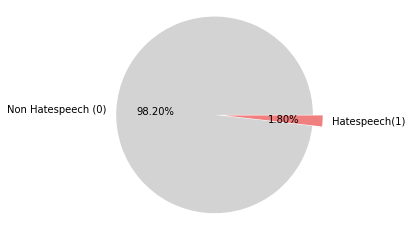

0    20921
1      383
Name: label, dtype: int64


In [46]:
#visualisasi antar jumlah data
labels = 'Non Hatespeech (0)', 'Hatespeech(1)'
sizes = dataset['label'].value_counts()
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
colors = ['#D3D3D3','#f08080']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, colors=colors, labels=labels, autopct='%.2f%%',
        shadow=False, startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
#melihat jumlah data untuk masing2 label
print(dataset['label'].value_counts())

In [5]:
#'split' data menggunakan K-Fold
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(dataset['tweet_text'], dataset['label'])

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
X=dataset['tweet_text']
y= dataset['label']
print(X.shape,y.shape)

(21304,) (21304,)


In [6]:
##### menggunakan kfold untuk menyeimbangkan split
for train_index, test_index in skf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

#menampilkan jumlah data train-test
print(X_train.shape,y_train.shape)   
print(X_test.shape,y_test.shape)

TRAIN: [ 1839  1846  1857 ... 21301 21302 21303] TEST: [   0    1    2 ... 4336 4337 4338]
TRAIN: [    0     1     2 ... 21301 21302 21303] TEST: [1839 1846 1857 ... 8605 8606 8607]
TRAIN: [    0     1     2 ... 21301 21302 21303] TEST: [ 4348  4359  4424 ... 12833 12834 12835]
TRAIN: [    0     1     2 ... 21301 21302 21303] TEST: [ 7980  8118  8260 ... 17062 17063 17064]
TRAIN: [    0     1     2 ... 17062 17063 17064] TEST: [15242 15279 15411 ... 21301 21302 21303]
(17044,) (17044,)
(4260,) (4260,)


In [7]:
X_train

0        antusiasme masyarakat akan hadirnya pemimpin m...
1                                            yo gas lagii 
2        hanya kekuatan iman yang mampu mengumpulkan um...
3        hal itu terulang di pilpres 2019 inibahkan msh...
4                                    orang gila masuk dpt 
5                                            lanjutkannnn 
6        sejuta lebih rakyat indonesia tumpah memadati ...
7        rp 46 m termasuk duit israel ditemukan kpk dar...
8                        indonesia adil makmur bersama 02 
9              beda adab beda pikiran beda mental beda iq 
10       suasana gbk dr sebelum subuh sampai siang hari...
11                          kebersihan sebagian dari iman 
12       alumni 212 berhak tentukan dukungan politik ke...
13        zikir bergema di kampanye akbar prabowosandiaga 
14       gus irfan bela sandi bendera saja protes nu ja...
15       belajar matematika duluhitung terussss1 2 3 ri...
16       indonesia menangindonesia adil makmurindonesia.

In [8]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(X)

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(X_train.values.astype('U'))
xvalid_count =  count_vect.transform(X_test.values.astype('U'))
print(xtrain_count.shape,xvalid_count.shape)

(17044, 25509) (4260, 25509)


In [9]:
#Fungsi feature extraction
def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary:
            nwords = nwords+1.
            feature_vector = np.add(feature_vector, model[word])
            
        if nwords:
            feature_vectore = np.divide(feature_vector, nwords)
        return feature_vector
    
def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
               for tokenized_sentence in corpus]
    return np.array(features)

def tfidf_wtd_avg_word_vectors(words, tfidf_vector, tfidf_vocabulary, model, num_features):
    word_tfidfs = [tfidf_vector[0, tfidf_vocabulary.get(word)]
                  if tfidf_vocabulary.get(word)
                  else 0 for word in words]
    word_tfidf_map = {word:tfidf_val for word, tfidf_val in zip(words, word_tfidfs)}
    feature_vector = np.zeros((num_features,),dtype="float64")
    vocabulary = set(model.wv.index2word)
    wts = 0.
    for word in words:
        if word in vocabulary:
            word_vector = model[word]
            weighted_word_vector = word_tfidf_map[word] * word_vector
            wts = wts + word_tfidf_map[word]
            feature_vector = np.add(feature_vector, weighted_word_vector)
    
    if wts:
        feature_vector = np.divide(feature_vector, wts)
        
    return feature_vector

def tfidf_weighted_averaged_word_vectorizer(corpus, tfidf_vectors,
                                          tfidf_vocabulary, model, num_features):
    docs_tfidfs = [(doc, doc_tfidf)
                  for doc, doc_tfidf
                  in zip(corpus, tfidf_vectors)]
    features = [tfidf_wtd_avg_word_vectors(tokenized_sentence, tfidf, tfidf_vocabulary,
                                          model, num_features)
               for tokenized_sentence, tfidf in docs_tfidfs]
    
    return np.array(features)

In [10]:
#pemanggilan Feature extraction
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit_transform(X)
xtrain_tfidf =  tfidf_vect.transform(X_train)
xvalid_tfidf =  tfidf_vect.transform(X_test)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(dataset['tweet_text'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(X_train)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(X_test)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(dataset['tweet_text'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_train) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_test)

In [11]:
print(xtrain_tfidf_ngram.shape)
print(xvalid_tfidf_ngram.shape)
print(xtrain_tfidf_ngram_chars.shape)
print(xtrain_tfidf_ngram_chars.shape)
print(xvalid_tfidf_ngram_chars)

(17044, 5000)
(4260, 5000)
(17044, 5000)
(17044, 5000)
  (0, 4941)	0.07962402100908472
  (0, 4935)	0.0514779831180622
  (0, 4887)	0.04168102167719437
  (0, 4871)	0.1338646347433124
  (0, 4870)	0.12747801227492836
  (0, 4690)	0.07785964340893234
  (0, 4682)	0.033724507745388675
  (0, 4632)	0.05405588043886362
  (0, 4623)	0.03276259313433674
  (0, 4615)	0.05090080210113957
  (0, 4599)	0.10594950825958582
  (0, 4586)	0.06929681642135925
  (0, 4484)	0.048903831924874734
  (0, 4477)	0.047865578451695937
  (0, 4474)	0.047835604062276806
  (0, 4469)	0.07330533940190327
  (0, 4398)	0.053924538581838516
  (0, 4395)	0.050198644238195214
  (0, 4335)	0.035017767009319065
  (0, 4323)	0.02873277181895694
  (0, 4311)	0.05487887320846382
  (0, 4291)	0.021973347973176596
  (0, 4277)	0.04680782612158591
  (0, 4256)	0.02392030603736265
  (0, 4117)	0.07350146317207373
  :	:
  (4259, 856)	0.0765989942999004
  (4259, 854)	0.05184825406984075
  (4259, 801)	0.11329972967634509
  (4259, 791)	0.0713756810726956

In [12]:
#feature extraction: Word2Vec
num_features = 500    # Word vector dimensionality                      
min_word_count = 40   # Minimum word count                        
num_workers = 3       # Number of threads to run in parallel
context = 10          # Context window size
downsampling = 1e-3   # Downsample setting for frequent words

In [13]:
#pertama: menghapus stop words
stop_re = '\\b'+'\\b|\\b'.join(nltk.corpus.stopwords.words('english'))+'\\b'
dataw2v = dataset['tweet_text'].str.replace(stop_re, '')
dataw2v.head(10)

0    antusiasme masyarakat akan hadirnya pemimpin m...
1                                        yo gas lagii 
2    hanya kekuatan iman yang mampu mengumpulkan um...
3    hal itu terulang di pilpres 2019 inibahkan msh...
4                                orang gila masuk dpt 
5                                        lanjutkannnn 
6    sejuta lebih rakyat indonesia tumpah memadati ...
7    rp 46  termasuk duit israel ditemukan kpk dari...
8                    indonesia adil makmur bersama 02 
9          beda adab beda pikiran beda mental beda iq 
Name: tweet_text, dtype: object

In [14]:
#kedua: pisahkan antar setiap kata
dataw2v = dataw2v.str.split()

dataw2v.head(10)

0    [antusiasme, masyarakat, akan, hadirnya, pemim...
1                                     [yo, gas, lagii]
2    [hanya, kekuatan, iman, yang, mampu, mengumpul...
3    [hal, itu, terulang, di, pilpres, 2019, inibah...
4                            [orang, gila, masuk, dpt]
5                                       [lanjutkannnn]
6    [sejuta, lebih, rakyat, indonesia, tumpah, mem...
7    [rp, 46, termasuk, duit, israel, ditemukan, kp...
8               [indonesia, adil, makmur, bersama, 02]
9    [beda, adab, beda, pikiran, beda, mental, beda...
Name: tweet_text, dtype: object

In [15]:
# Detect common phrases so that we may treat each one as its own word
phrases = gensim.models.phrases.Phrases(dataw2v.tolist())
phraser = gensim.models.phrases.Phraser(phrases)
dataw2v = phraser[dataw2v.tolist()]

In [16]:
#feature extraction: Word2Vec
modelvalid = gensim.models.word2vec.Word2Vec(sentences=dataw2v,workers=32,size=500,
                              window=100,
                             min_count=30,
                              sample=1e-3)
#menampilkan shape dari modelvalid
modelvalid.wv.vectors.shape

(776, 500)

In [17]:
#list kata-kata yang ada dalam model word2vec
print(modelvalid.wv.index2word)

['yg', 'dan', 'di', 'yang', 'ini', 'kita', 'ada', 'itu', 'untuk', 'rakyat', 'bisa', 'dari', 'ya', 'saya', 'akan', 'lagi', 'indonesia', 'prabowo', 'pak', 'mau', 'dengan', 'sudah', 'aja', 'kami', 'gak', 'siap', 'bang', 'ke', 'tidak', '02', 'jokowi', 'semoga', 'jadi', 'semangat', 'tak', 'gunung', 'bukan', 'nya', 'ga', 'apa', 'semua', 'sama', 'presiden', 'amp', 'juga', 'karena', 'buat', 'mereka', 'menang', 'allah', 'orang', 'tagar', 'tapi', 'jangan', 'utk', 'kampanye', 'prabowo_sandi', 'kalau', 'harus', 'udah', 'kalo', 'banyak', 'gbk', 'masih', 'hanya', 'insya_allah', 'tetap', '2019', 'cebong', '17_april', 'adalah', 'pada', 'terus', 'sampai', 'pasti', 'di_gbk', 'dalam', 'akal_sehat', 'negara', 'mantap', 'kpu', 'bangsa', 'aku', 'ayo', 'baru', 'ikut', 'pilih', 'saja', 'dgn', 'perubahan', 'kok', 'hati', 'makmur', 'nih', 'setuju', 'sdh', 'bersama', 'prabowosandi', 'kemenangan', 'lebih', 'insyaallah', 'kan', 'aamiin', 'biar', 'lah', 'kalian', 'dia', 'cuma', 'doa', 'si', 'massa', 'atau', 'gw', '

In [18]:
#mencari kata yang berelasi
print(modelvalid.wv.most_similar("cebong"))

[('kok', 0.999863862991333), ('udah', 0.9998317956924438), ('apa', 0.9998036623001099), ('nya', 0.999799370765686), ('kalau', 0.9997979402542114), ('ya', 0.9997978806495667), ('ada', 0.9997847676277161), ('itu', 0.9997027516365051), ('gw', 0.9996843934059143), ('sama', 0.9996694326400757)]


In [19]:
#fungsi untuk mengembalikan model word2vec
def review_to_wordlist(review, remove_stopwords=False):
    """
    Convert a review to a list of words. Removal of stop words is optional.
    """
    # remove non-letters
    review_text = re.sub("[^a-zA-Z]"," ", review)
    
    # convert to lower case and split at whitespace
    words = review_text.lower().split()
    
    # remove stop words (false by default)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]

    return words

def make_feature_vec(words, modelvalid, num_features):
    """
    Average the word vectors for a set of words
    """
    feature_vec = np.zeros((num_features,),dtype="float32")  # pre-initialize (for speed)
    nwords = 0
    index2word_set = set(modelvalid.wv.index2word)  # words known to the model

    for word in words:
        if word in index2word_set: 
            nwords = nwords + 1
            feature_vec = np.add(feature_vec,modelvalid[word])
    
    feature_vec = np.divide(feature_vec, nwords)
    return feature_vec


def get_avg_feature_vecs(reviews, modelvalid, num_features):
    """
    Calculate average feature vectors for all reviews
    """
    counter = 0
    review_feature_vecs = np.zeros((len(reviews),num_features), dtype='float32')  # pre-initialize (for speed)
    
    for review in dataset['tweet_text']:
        review_feature_vecs[counter] = make_feature_vec(review, modelvalid, num_features)
        counter = counter + 1
    return review_feature_vecs

In [20]:
# calculate average feature vectors for training and test sets
clean_train_reviews = []
for review in dataset['tweet_text']:
    clean_train_reviews.append(review_to_wordlist(review, remove_stopwords=True))
trainDataVecs = get_avg_feature_vecs(clean_train_reviews, modelvalid, num_features)

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:30: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


In [21]:
#melihat isi traindatavecs
print(trainDataVecs)

[[ 0.04120637  0.02040032  0.01612502 ...  0.00954768  0.03606554
  -0.06178002]
 [ 0.03857592  0.02268746  0.01577436 ...  0.00456171  0.03295789
  -0.06546982]
 [ 0.04057505  0.02094923  0.01604086 ...  0.00835104  0.0353197
  -0.06266557]
 ...
 [ 0.04120637  0.02040032  0.01612502 ...  0.00954768  0.03606554
  -0.06178002]
 [ 0.03966754  0.0202688   0.01604362 ...  0.00752518  0.03354398
  -0.06089622]
 [ 0.04032956  0.0211627   0.01600813 ...  0.00788568  0.03502965
  -0.06300995]]


In [22]:
#split model
Xtrainw2v, Xtestw2v, y_trainw2v, y_testw2v = train_test_split(trainDataVecs, y,test_size=0.2,random_state=123)

In [23]:
#mengisi data yang kosong dan menjadikan nilainya absolut
Xtrainw2v=np.nan_to_num(Xtrainw2v)
Xtestw2v=np.nan_to_num(Xtestw2v)

Xtrainw2v=np.absolute(Xtrainw2v)
Xtestw2v=np.absolute(Xtestw2v)

In [24]:
#fungsi prediksi+ploting

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:', np.round(
                        metrics.accuracy_score(true_labels,
                                              predicted_labels),
                        2))
    print('Precision:', np.round(
                        metrics.precision_score(true_labels,
                                              predicted_labels,
                                               average='weighted'),
                        2))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels,
                                              predicted_labels,
                                               average='weighted'),
                        2))
    print('F1 Score:', np.round(
                        metrics.f1_score(true_labels,
                                              predicted_labels,
                                               average='weighted'),
                        2))
    print('CR:', metrics.classification_report(true_labels,
                                                predicted_labels))
    
def train_predict_evaluate_model (classifier, 
                                 train_features, 
                                 train_labels,
                                test_features, 
                                 test_labels):
    classifier.fit(train_features, train_labels)
    predictions = classifier.predict(test_features)
    get_metrics(true_labels = test_labels,
               predicted_labels=predictions)
     # Plot non-normalized confusion matrix
    cnf_matrix = metrics.confusion_matrix(test_labels,predictions)
    plt.figure()
    class_names = ['Non Hatespeech', 'Hatespeech']
    plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')
    plt.show()
    return predictions


MNB N-Gram TF-IDF
Accuracy: 0.98
Precision: 0.96
Recall: 0.98
F1 Score: 0.97
CR:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      4184
           1       0.00      0.00      0.00        76

    accuracy                           0.98      4260
   macro avg       0.49      0.50      0.50      4260
weighted avg       0.96      0.98      0.97      4260

Confusion matrix, without normalization
[[4184    0]
 [  76    0]]


/opt/tljh/user/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


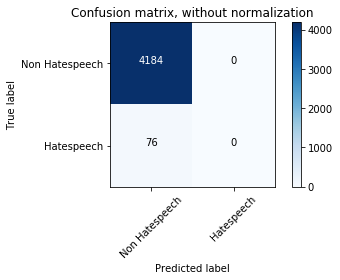

------------------------------------------
MNB N-Gram Word level
Accuracy: 0.91
Precision: 0.96
Recall: 0.91
F1 Score: 0.94
CR:               precision    recall  f1-score   support

           0       0.98      0.93      0.95      4184
           1       0.00      0.00      0.00        76

    accuracy                           0.91      4260
   macro avg       0.49      0.46      0.48      4260
weighted avg       0.96      0.91      0.94      4260

Confusion matrix, without normalization
[[3885  299]
 [  76    0]]


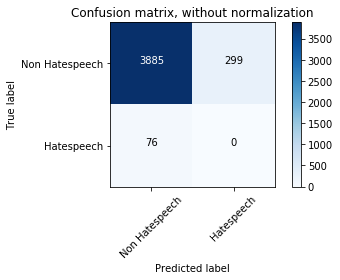

------------------------------------------
MNB N-Gram Char Level
Accuracy: 0.98
Precision: 0.96
Recall: 0.98
F1 Score: 0.97
CR:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      4184
           1       0.00      0.00      0.00        76

    accuracy                           0.98      4260
   macro avg       0.49      0.50      0.50      4260
weighted avg       0.96      0.98      0.97      4260

Confusion matrix, without normalization
[[4178    6]
 [  76    0]]


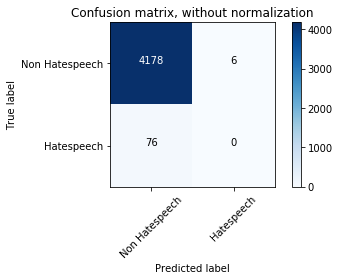

------------------------------------------
MNB W2V
Accuracy: 0.98
Precision: 0.96
Recall: 0.98
F1 Score: 0.97
CR:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      4174
           1       0.00      0.00      0.00        87

    accuracy                           0.98      4261
   macro avg       0.49      0.50      0.49      4261
weighted avg       0.96      0.98      0.97      4261

Confusion matrix, without normalization
[[4174    0]
 [  87    0]]


/opt/tljh/user/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


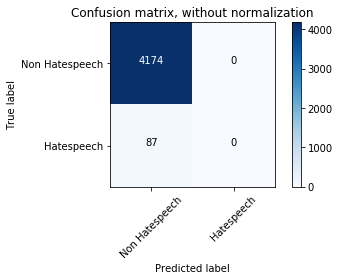

------------------------------------------


In [37]:
#prediksi NAIVE BAYES
mnb = naive_bayes.MultinomialNB()

print('MNB N-Gram TF-IDF')
mnb_bow_predictions = train_predict_evaluate_model(classifier=mnb,
                                                  train_features=xtrain_tfidf,
                                                  train_labels=y_train,
                                                  test_features=xvalid_tfidf,
                                                  test_labels=y_test)
print('------------------------------------------')

print('MNB N-Gram Word level')
mnb_bow_predictions = train_predict_evaluate_model(classifier=mnb,
                                                  train_features=xtrain_tfidf_ngram,
                                                  train_labels=y_train,
                                                  test_features=xvalid_tfidf_ngram,
                                                  test_labels=y_test)
print('------------------------------------------')

print('MNB N-Gram Char Level')
mnb_bow_predictions = train_predict_evaluate_model(classifier=mnb,
                                                  train_features=xtrain_tfidf_ngram_chars,
                                                  train_labels=y_train,
                                                  test_features=xvalid_tfidf_ngram_chars,
                                                  test_labels=y_test)
print('------------------------------------------')

print('MNB W2V')
mnb_bow_predictions = train_predict_evaluate_model(classifier=mnb,
                                                  train_features=Xtrainw2v,
                                                  train_labels=y_trainw2v,
                                                  test_features=Xtestw2v,
                                                  test_labels=y_testw2v)
print('------------------------------------------')



BNB TFIDF
Accuracy: 0.94
Precision: 0.97
Recall: 0.94
F1 Score: 0.95
CR:               precision    recall  f1-score   support

           0       0.98      0.95      0.97      4184
           1       0.06      0.17      0.09        76

    accuracy                           0.94      4260
   macro avg       0.52      0.56      0.53      4260
weighted avg       0.97      0.94      0.95      4260

Confusion matrix, without normalization
[[3978  206]
 [  63   13]]


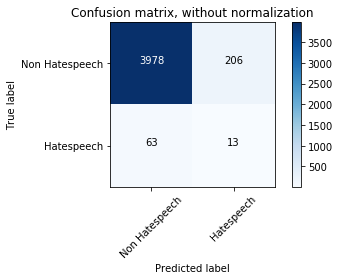

------------------------------------------
BNB N-Gram Word Level
Accuracy: 0.83
Precision: 0.96
Recall: 0.83
F1 Score: 0.89
CR:               precision    recall  f1-score   support

           0       0.98      0.84      0.91      4184
           1       0.01      0.08      0.02        76

    accuracy                           0.83      4260
   macro avg       0.49      0.46      0.46      4260
weighted avg       0.96      0.83      0.89      4260

Confusion matrix, without normalization
[[3528  656]
 [  70    6]]


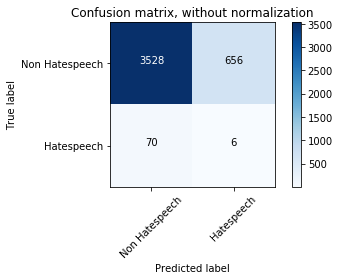

------------------------------------------
BNB N-Gram Char Level
Accuracy: 0.8
Precision: 0.97
Recall: 0.8
F1 Score: 0.88
CR:               precision    recall  f1-score   support

           0       0.99      0.81      0.89      4184
           1       0.04      0.39      0.07        76

    accuracy                           0.80      4260
   macro avg       0.51      0.60      0.48      4260
weighted avg       0.97      0.80      0.88      4260

Confusion matrix, without normalization
[[3397  787]
 [  46   30]]


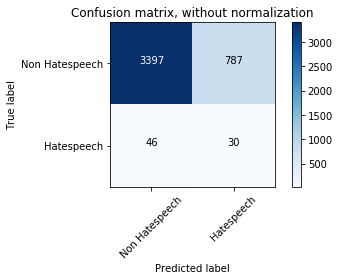

------------------------------------------
BNB W2V
Accuracy: 0.11
Precision: 0.98
Recall: 0.11
F1 Score: 0.17
CR:               precision    recall  f1-score   support

           0       1.00      0.09      0.17      4174
           1       0.02      1.00      0.04        87

    accuracy                           0.11      4261
   macro avg       0.51      0.55      0.11      4261
weighted avg       0.98      0.11      0.17      4261

Confusion matrix, without normalization
[[ 384 3790]
 [   0   87]]


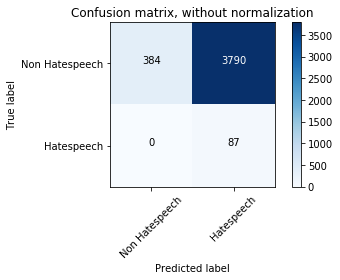

------------------------------------------


In [38]:
#prediksi NAIVE BAYES
mnb = naive_bayes.BernoulliNB()

print('BNB TFIDF')
mnb_bow_predictions = train_predict_evaluate_model(classifier=mnb,
                                                  train_features=xtrain_tfidf,
                                                  train_labels=y_train,
                                                  test_features=xvalid_tfidf,
                                                  test_labels=y_test)
print('------------------------------------------')

print('BNB N-Gram Word Level')
mnb_bow_predictions = train_predict_evaluate_model(classifier=mnb,
                                                  train_features=xtrain_tfidf_ngram,
                                                  train_labels=y_train,
                                                  test_features=xvalid_tfidf_ngram,
                                                  test_labels=y_test)
print('------------------------------------------')

print('BNB N-Gram Char Level')
mnb_bow_predictions = train_predict_evaluate_model(classifier=mnb,
                                                  train_features=xtrain_tfidf_ngram_chars,
                                                  train_labels=y_train,
                                                  test_features=xvalid_tfidf_ngram_chars,
                                                  test_labels=y_test)
print('------------------------------------------')

print('BNB W2V')
mnb_bow_predictions = train_predict_evaluate_model(classifier=mnb,
                                                  train_features=Xtrainw2v,
                                                  train_labels=y_trainw2v,
                                                  test_features=Xtestw2v,
                                                  test_labels=y_testw2v)
print('------------------------------------------')


Logistic Regression + TF-IDF
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.97
CR:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      4184
           1       1.00      0.03      0.05        76

    accuracy                           0.98      4260
   macro avg       0.99      0.51      0.52      4260
weighted avg       0.98      0.98      0.97      4260

Confusion matrix, without normalization
[[4184    0]
 [  74    2]]


/opt/tljh/user/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


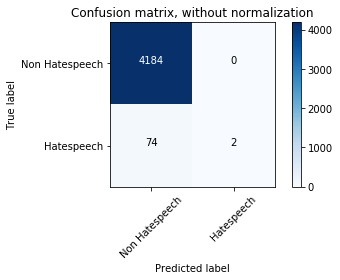

------------------------------------------
Logistic Regression + N-Gram word level
Accuracy: 0.98
Precision: 0.96
Recall: 0.98
F1 Score: 0.97
CR:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      4184
           1       0.00      0.00      0.00        76

    accuracy                           0.98      4260
   macro avg       0.49      0.50      0.50      4260
weighted avg       0.96      0.98      0.97      4260

Confusion matrix, without normalization
[[4184    0]
 [  76    0]]


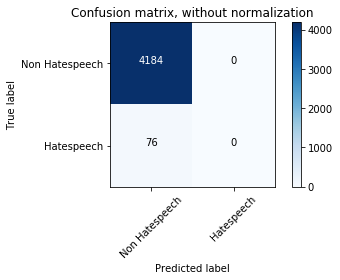

------------------------------------------
Logistic Regression + N-Gram Char Level
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98
CR:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      4184
           1       1.00      0.05      0.10        76

    accuracy                           0.98      4260
   macro avg       0.99      0.53      0.55      4260
weighted avg       0.98      0.98      0.98      4260

Confusion matrix, without normalization
[[4184    0]
 [  72    4]]


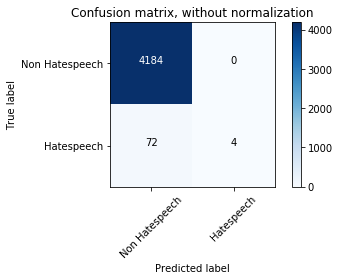

------------------------------------------
Logistic Regression + W2V
Accuracy: 0.98
Precision: 0.96
Recall: 0.98
F1 Score: 0.97
CR:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      4174
           1       0.00      0.00      0.00        87

    accuracy                           0.98      4261
   macro avg       0.49      0.50      0.49      4261
weighted avg       0.96      0.98      0.97      4261

Confusion matrix, without normalization
[[4174    0]
 [  87    0]]


/opt/tljh/user/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


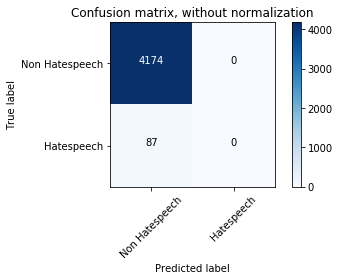

------------------------------------------


In [34]:
#Prediksi Logistic Regression

print('Logistic Regression + TF-IDF')
mnb_bow_predictions = train_predict_evaluate_model(classifier=linear_model.LogisticRegression(),
                                                  train_features=xtrain_tfidf,
                                                  train_labels=y_train,
                                                  test_features=xvalid_tfidf,
                                                  test_labels=y_test)
print('------------------------------------------')

print('Logistic Regression + N-Gram word level')
mnb_bow_predictions = train_predict_evaluate_model(classifier=linear_model.LogisticRegression(),
                                                  train_features=xtrain_tfidf_ngram,
                                                  train_labels=y_train,
                                                  test_features=xvalid_tfidf_ngram,
                                                  test_labels=y_test)
print('------------------------------------------')

print('Logistic Regression + N-Gram Char Level')
mnb_bow_predictions = train_predict_evaluate_model(classifier=linear_model.LogisticRegression(),
                                                  train_features=xtrain_tfidf_ngram_chars,
                                                  train_labels=y_train,
                                                  test_features=xvalid_tfidf_ngram_chars,
                                                  test_labels=y_test)
print('------------------------------------------')

print('Logistic Regression + W2V')
mnb_bow_predictions = train_predict_evaluate_model(classifier=linear_model.LogisticRegression(),
                                                 train_features=Xtrainw2v,
                                                  train_labels=y_trainw2v,
                                                  test_features=Xtestw2v,
                                                  test_labels=y_testw2v)
print('------------------------------------------')



SVM TF-IDF
Accuracy: 0.98
Precision: 0.96
Recall: 0.98
F1 Score: 0.97
CR:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      4184
           1       0.00      0.00      0.00        76

    accuracy                           0.98      4260
   macro avg       0.49      0.50      0.50      4260
weighted avg       0.96      0.98      0.97      4260

Confusion matrix, without normalization
[[4184    0]
 [  76    0]]


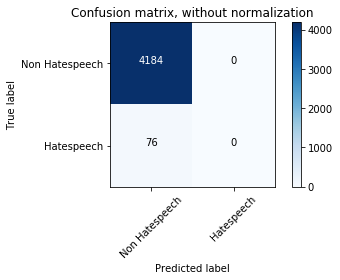

------------------------------------------
SVM N-Gram Word Level
Accuracy: 0.98
Precision: 0.96
Recall: 0.98
F1 Score: 0.97
CR:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      4184
           1       0.00      0.00      0.00        76

    accuracy                           0.98      4260
   macro avg       0.49      0.50      0.50      4260
weighted avg       0.96      0.98      0.97      4260

Confusion matrix, without normalization
[[4184    0]
 [  76    0]]


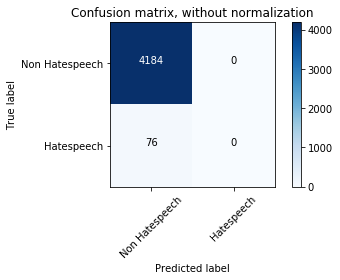

------------------------------------------
SVM N-Gram Char Level
Accuracy: 0.98
Precision: 0.96
Recall: 0.98
F1 Score: 0.97
CR:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      4184
           1       0.00      0.00      0.00        76

    accuracy                           0.98      4260
   macro avg       0.49      0.50      0.50      4260
weighted avg       0.96      0.98      0.97      4260

Confusion matrix, without normalization
[[4184    0]
 [  76    0]]


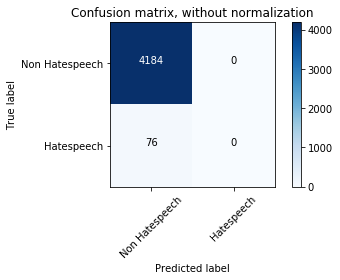

------------------------------------------
SVM + W2V
Accuracy: 0.98
Precision: 0.96
Recall: 0.98
F1 Score: 0.97
CR:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      4174
           1       0.00      0.00      0.00        87

    accuracy                           0.98      4261
   macro avg       0.49      0.50      0.49      4261
weighted avg       0.96      0.98      0.97      4261

Confusion matrix, without normalization
[[4174    0]
 [  87    0]]


/opt/tljh/user/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


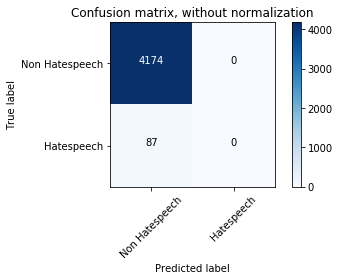

------------------------------------------


In [36]:
#prediksi SVM
print('SVM TF-IDF')
mnb_bow_predictions = train_predict_evaluate_model(classifier=linear_model.SGDClassifier(),
                                                  train_features=xtrain_tfidf,
                                                  train_labels=y_train,
                                                  test_features=xvalid_tfidf,
                                                  test_labels=y_test)
print('------------------------------------------')

print('SVM N-Gram Word Level')
mnb_bow_predictions = train_predict_evaluate_model(classifier=linear_model.SGDClassifier(),
                                                  train_features=xtrain_tfidf_ngram,
                                                  train_labels=y_train,
                                                  test_features=xvalid_tfidf_ngram,
                                                  test_labels=y_test)
print('------------------------------------------')

print('SVM N-Gram Char Level')
mnb_bow_predictions = train_predict_evaluate_model(classifier=linear_model.SGDClassifier(),
                                                  train_features=xtrain_tfidf_ngram_chars,
                                                  train_labels=y_train,
                                                  test_features=xvalid_tfidf_ngram_chars,
                                                  test_labels=y_test)
print('------------------------------------------')

print('SVM + W2V')
mnb_bow_predictions = train_predict_evaluate_model(classifier=linear_model.SGDClassifier(),
                                                  train_features=Xtrainw2v,
                                                  train_labels=y_trainw2v,
                                                  test_features=Xtestw2v,
                                                  test_labels=y_testw2v)
print('------------------------------------------')

In [40]:
classifier = linear_model.LogisticRegression()
classifier.fit(xtrain_tfidf_ngram_chars, y_train)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
test = ["china nganggur dikasih kerjaan di sini orang sini nganggur eh malah dikasih kartumiriss "]
output = classifier.predict(tfidf_vect_ngram_chars.transform(test))
print(output)

[0]
